<a href="https://colab.research.google.com/github/nrajmalwar/Project/blob/master/Phase%202%20Session%201/Assignment_P2S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One-hot encoding of words and characters

In [0]:
# Word-level one-hot encoding (toy example)
import numpy as np

# Initial data, consists of two sentences which with 2 entries
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# Define an empty dictionary. Will be used to save the index of each token (word in this case)
token_index = {}
# Iterate over each sample
for sample in samples:
  # Iterate over each word in the sentence
  for word in sample.split():
    # If the word is not already assigned as a token, assign it to a new token
    if word not in token_index:
      # The tokens are numbered serially with their chronology of occurence
      token_index[word] = len(token_index) + 1

# Define the maximum length of a sentence (maximum no. of words)
max_length = 10
# Store the final array in a 3D array of size length of samples x max length of sentence x total no. of tokens
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
# Iterate over the samples and their index
for i, sample in enumerate(samples):
  # Iterate over each word in a sentence and its index within that sentence (Consider max length of 20 words)
  for j, word in list(enumerate(sample.split()))[:max_length]:
    # Get the particular index of the word
    index = token_index.get(word)
    # Assign the value 1 at the position-index of sentence in samples and the position of word for that sentence
    # and the index of that word/token
    results[i, j, index] = 1.

In [0]:
# Character-level one-hot encoding (toy example)
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# Get all the characters in the English alphabet. We read our samples character wise for each sentence
characters = string.printable
# Assign an index to each token (which is a character in this case)
token_index = dict(zip(range(1, len(characters) + 1), characters))
# We use max length of 50 characters for each sentence
max_length = 50
# Store the final result in a 3D one-hot encoded array 
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    # Assign token value for each character instead of each word
    results[i, j, index] = 1.

In [0]:
# Using Keras for word-level one-hot encoding
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# create a tokenizer object with top 1000 most common words
tokenizer = Tokenizer(num_words=1000)
# Build the index for the input data
tokenizer.fit_on_texts(samples)
# Turn strings into lists of integer indices
sequences = tokenizer.texts_to_sequences(samples)
# Turn strings directly into one-hot encoded array
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
# Recover the word index
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


In [0]:
# Word-level one-hot encoding with hashing trick (toy example)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# Store the words as vectors of 1000 dimension
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    # Hashes the word randomly between integers 0 and 1000
    index = abs(hash(word)) % dimensionality
    results[i, j, index] = 1.

# Using Word Embeddings

In [0]:
# Instantiating an Embedding layer
from keras.layers import Embedding
# Creates 1000 randomly initialized token/feature vectors of 64 dimensions
embedding_layer = Embedding(1000, 64)

In [0]:
# Loading the IMDB data for use with an Embedding layer
from keras.datasets import imdb
from keras import preprocessing
# Max no. of words to consider as features
max_features = 10000
# Maximum length of a sentence (max. no. of words in a sentence)
maxlen = 20
# Load the imdb data as a list of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# Turns a list of integers into a 2D tensor of shape (samples, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
# Using an Embedding layer and classifier on the IMDB data
from keras.models import Sequential
from keras.layers import Flatten, Dense
# Define a sequential model
model = Sequential()
# Define the max input length to the embedding layer so that you can flatten it later
model.add(Embedding(10000, 8, input_length=maxlen))
# Flatten the 3D tensor of embeddings into a 2D tensor of shape (samples, max_len*8)
model.add(Flatten())
# Add a dense layer for classification
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
# Train the model for 10 epochs, using 20% of the data for validation
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 11s 542us/step - loss: 0.6655 - acc: 0.6306 - val_loss: 0.6125 - val_acc: 0.6978
Epoch 2/10
20000/20000 [==============================] - 2s 103us/step - loss: 0.5399

# Using Pretrained Word Embeddings

In [0]:
# Download the imdb raw dataset
!wget --no-check-certificate 'http://mng.bz/0tIo'

--2020-03-20 17:29:52--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2020-03-20 17:29:52--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2020-03-20 17:29:53--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.160.69
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.160.69|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  26.3MB/s    in 2.2s    

2020-03-20 17:29:55 (26.3 MB/s) - ‘0tIo’ saved [60711700/60711700]

In [0]:
# Unzip the file
!unzip '0tIo' 

In [0]:
!ls

0tIo  aclImdb  __MACOSX  sample_data


In [0]:
!ls aclImdb

test  train


In [0]:
# Processing the labels of the raw IMDB data
import os
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
# Store the label of each review
labels = []
# Store the reviews in a list
texts = []
# Positive and negative reviews are stored in two separate folders
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    # All the reviews are stored as text files, we append each review to a list
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      # Append the label for each review to a list
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [0]:
len(texts)

25000

In [0]:
# Tokenizing the text of the raw IMDB data
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
# Max length of review is 100 words
maxlen = 100
# Use 8000 training samples
training_samples = 8000
# Use 10000 validation samples
validation_samples = 10000
# Use top 10000 words from the dataset
max_words = 10000
# Create a tokenizer object
tokenizer = Tokenizer(num_words=max_words)
# Tokenize the words in the dataset
tokenizer.fit_on_texts(texts)
# Converts strings to list of integer indices
sequences = tokenizer.texts_to_sequences(texts)
# Build the word-index dictionary
word_index = tokenizer.word_index
# Print the no. of unique tokens
print('Found %s unique tokens.' % len(word_index))
# Pad sequences with zeros if lenght is less than maxlen
data = pad_sequences(sequences, maxlen=maxlen)
# Convert the labels to numpy array
labels = np.asarray(labels)
# Print the shape of input data and label
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
# Store all the indices in an array
indices = np.arange(data.shape[0])
# Shuffle the indices
np.random.shuffle(indices)
# Shuffle the data using indices (because data samples are ordered, all negatives first, then all positives)
data = data[indices]
labels = labels[indices]

# Split the data into training set and validation set
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [0]:
# Download precomputed word embeddings from the GloVe database
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-03-20 17:56:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-20 17:56:08--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-20 17:56:09--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
# Unzip the file
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
!ls

0tIo	 glove		    glove.6B.200d.txt  glove.6B.50d.txt  __MACOSX
aclImdb  glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip	 sample_data


In [0]:
# Parsing the GloVe word-embeddings file
glove_dir = '/content'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  # Build a word-index dictionary for all the 6 billion words
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
# Preparing the GloVe word-embeddings matrix
# Dimension of embedding vector is 100
embedding_dim = 100
# Define an empty matrix with shape (max_words, embedding_dim)
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  # Use only max_words = 10,000 words from the word index
  if i < max_words:
    # Get the embedding vector of the word from GloVe
    embedding_vector = embeddings_index.get(word)
    # Append the embedding vector to the embedding matrix for each word
    # If the word in not in the embeddings, it will remain zero
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [0]:
# Model definition
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
# Use the same model as before
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Loading pretrained word embeddings into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
# Training and evaluation
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
# Train the model for 20 epochs
history = model.fit(x_train, y_train,
epochs=20,
batch_size=64,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 8000 samples, validate on 10000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 113us/step - loss: 0.0079 - acc: 0.9978 - val_loss: 2.4264 - val_acc: 0.6883
Epoch 2/20
8000/8000 [==============================] - 1s 77us/step - loss: 0.0158 - acc: 0.9965 - val_loss: 2.5015 - val_acc: 0.6795
Epoch 3/20
8000/8000 [==============================] - 1s 81us/step - loss: 8.8662e-05 - acc: 1.0000 - val_loss: 2.5396 - val_acc: 0.6860
Epoch 4/20
8000/8000 [==============================] - 1s 78us/step - loss: 0.0071 - acc: 0.9979 - val_loss: 2.4705 - val_acc: 0.6878
Epoch 5/20
8000/8000 [==============================] - 1s 80us/step - loss: 0.0059 - acc: 0.9985 - val_loss: 2.5255 - val_acc: 0.6813
Epoch 6/20
8000/8000 [==============================] - 1s 77us/step - loss: 0.0092 - acc: 0.9979 - val_loss: 2.4994 - val_acc: 0.6836
Epoch 7/20
8000/8000 [==============================] - 1s 80us/step - loss: 8.7802e-05 - acc: 1.0000 - val_loss: 2.5100 - val_acc: 0.68

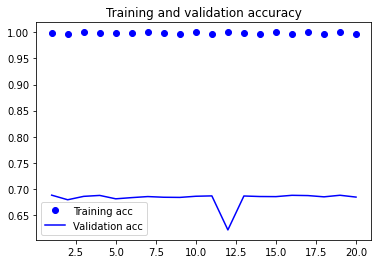

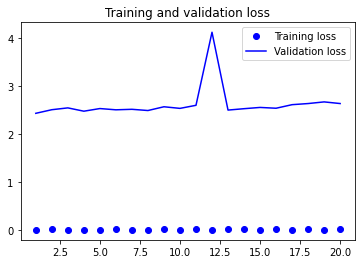

In [0]:
# Plotting the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Model quickly starts overfitting on the training dataset
# We get validation accuracy of ~68%

In [0]:
# Training the same model without pretrained word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=20,
batch_size=64,
validation_data=(x_val, y_val))
model.save_weights('without_pre_trained_glove_model.h5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 10000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 144us/step - loss: 0.5632 - acc: 0.6985 - val_loss: 0.4180 - val_acc: 0.8108
Epoch 2/20
8000/8000 [==============================] - 1

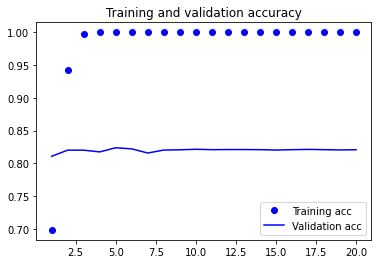

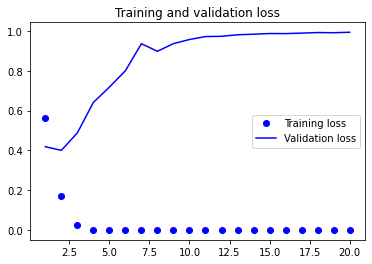

In [0]:
# Plotting the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# If train without the pretrained weights, the model performs better with validation accuracy of ~82%
# There are 8000 samples in the training data and the embedding vectors change with backpropagation
# to predict the class better

In [0]:
# Tokenizing the data of the test set
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [0]:
# Evaluating the model on the test set
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 44us/step


[2.598919033599049, 0.68904]

In [0]:
# Evaluating the model on the test set without pretrained glove model
model.load_weights('without_pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 42us/step


[0.9728273088896274, 0.8212]